In [25]:
from collections import Counter
import re
import glob
import seaborn as sns
import pandas as pd

In [13]:
# Replace ^M, i.e., '\r\n' with '\n'
with open('data/Y1test.csv') as f:
    content = f.readlines()
print(content[:10])


for i in [1,3,4,5,6,7]:
    input_file = f'data/Y{i}test.csv'
    output_file = f'data/Y{i}test_clean.csv'
    with open(input_file, 'r') as f:
        content = f.readlines()
    with open(output_file, 'w') as f:
        for line in content:
            if line != '\n':
                f.write(line)

["43\tthere's\n", '\n', '43\tone\n', '\n', '43\tthing\n', '\n', '43\tthat\n', '\n', '43\tI\n', '\n']


In [20]:
labels = Counter()
count = 0

input_files = glob.glob('data/Y*test_clean.csv')

for input_file in input_files:
    with open(input_file, 'r') as f:
        for line in f:
            lb, w = re.split('\t+', line.strip())
            labels[lb] += 1
            
print(labels)

Counter({'70': 8100, '69': 3984, '43': 662, '42': 346, '40': 297, '78': 270, '52': 156, '39': 130, '79': 128, '67': 121, '51': 109, '48': 85, '66': 74, '60': 56, '61': 49, '129': 39, '72': 26, '100': 25, '75': 22, '49': 21, '120': 19, '63': 18, '96': 14, '97': 13, '30': 13, '25': 13, '15': 13, '171': 12, '50': 12, '24': 11, '90': 11, '138': 11, '168': 10, '195': 10, '55': 9, '45': 9, '99': 8, '58': 8, '73': 7, '109': 7, '33': 6, '111': 6, '57': 5, '0': 5, '102': 4, '106': 3, '16': 3, '22': 2, '18': 2, '21': 2, '37': 2, '135': 2, '141': 2, '1': 1, '34': 1, '20': 1, '23': 1, '46': 1, '10': 1, '172': 1, '126': 1, '133': 1, '136': 1, '27': 1, '36': 1, '82': 1, '108': 1, '114': 1, '105': 1})


In [24]:
tips = sns.load_dataset("tips")
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [37]:
labels_records = labels.most_common()
# print(labels_records)
labels_df = pd.DataFrame.from_records(labels_records)
labels_df = labels_df.rename(columns={0:'Action', 1:'Count'})
print(labels_df)

   Action  Count
0      70   8100
1      69   3984
2      43    662
3      42    346
4      40    297
..    ...    ...
64     36      1
65     82      1
66    108      1
67    114      1
68    105      1

[69 rows x 2 columns]


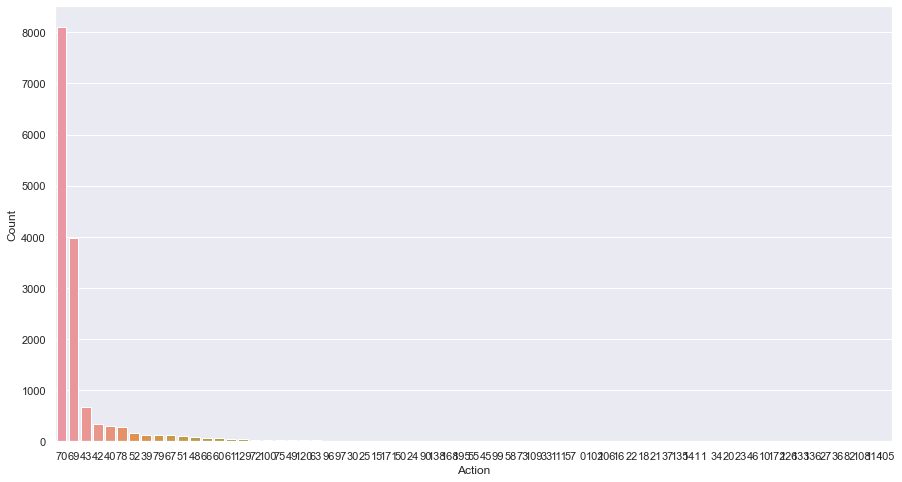

In [40]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='Action', y='Count', data=labels_df)

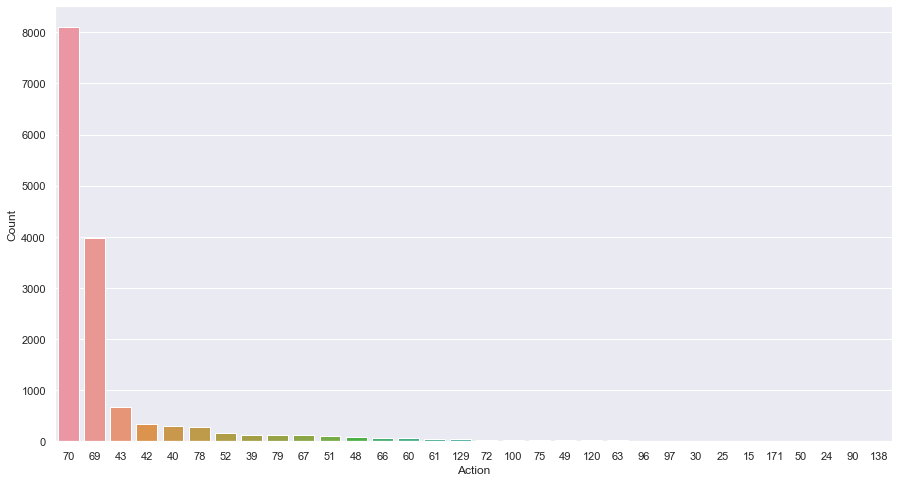

In [44]:
ax = sns.barplot(x='Action', y='Count', data=labels_df[labels_df.Count>10])